In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import networkx as nx
import pandas as pd
import numpy as np

### Load data

In [2]:
path = ''
data = pd.read_excel(path + '2022-2023 Football Player Stats.xlsx',index_col=0)
print(data)

                 Player Nation   Pos          Squad            Comp  Age  \
Rk                                                                         
1      Brenden Aaronson    USA  MFFW   Leeds United  Premier League   21   
2      Yunis Abdelhamid    MAR    DF          Reims         Ligue 1   35   
3         Himad Abdelli    FRA    MF         Angers         Ligue 1   22   
4     Salis Abdul Samed    GHA    MF           Lens         Ligue 1   22   
5       Laurent Abergel    FRA    MF        Lorient         Ligue 1   29   
...                 ...    ...   ...            ...             ...  ...   
2235       Nadir Zortea    ITA    DF       Atalanta         Serie A   23   
2236         Kurt Zouma    FRA    DF       West Ham  Premier League   27   
2237      Igor Zubeldia    ESP    DF  Real Sociedad         La Liga   25   
2238    Mart_ Zubimendi    ESP    MF  Real Sociedad         La Liga   23   
2239   Szymon ?urkowski    POL    MF     Fiorentina         Serie A   25   

      Born 

### Process outliers data

#### After I visualize the data, I notice that some data are obvious error, such as some player age over 100 or lower than 16.  The number of goals by someone are higher than shoot. I repalce these error value by average value. 

In [3]:
# Age data
deal = lambda s: 45 if s>100 else (16 if s<=16 else s)
data['Age'] = data['Age'].apply(deal)
# the number of shoot data
deal = lambda s: 1.5 if s>10 else s
data['SoT'] = data['SoT'].apply(deal)

### Visual analysis

#### This part I use three kind of iamge. They are histogram, wordcloud and kernel density map.

#### Histogram

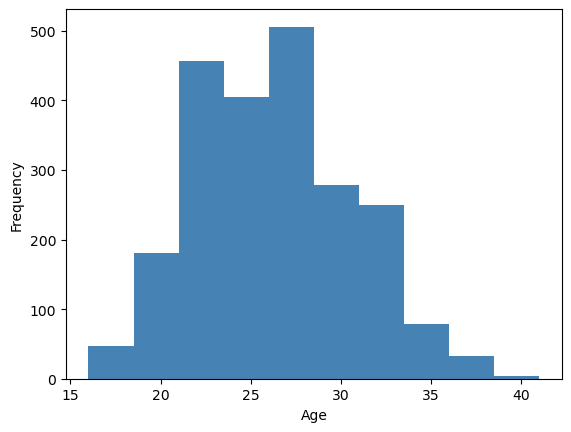

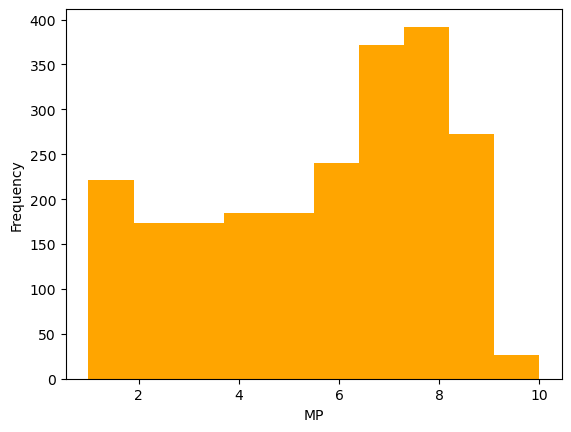

In [4]:
plt.hist(data['Age'], color='SteelBlue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.hist(data['MP'], color='orange')
plt.xlabel('MP')
plt.ylabel('Frequency')
plt.show()

#### Wordcloud map

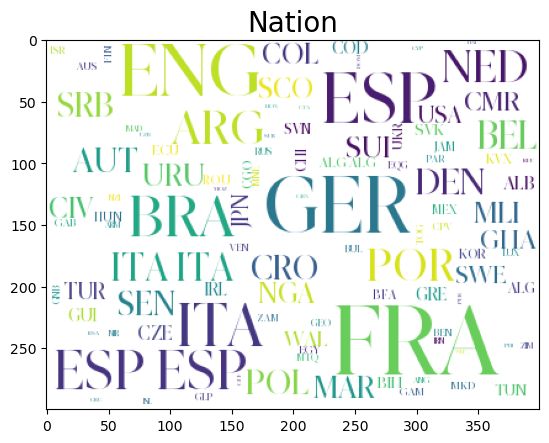

In [5]:
#wordcloud
def dlst(lst,nlst):
    for i in lst:
        if not isinstance(i, list):
            nlst.append(i)
        else:
            dlst(i,nlst)
    return nlst
word_ls = data['Nation']
wordres_ls = dlst(word_ls,[])
wordresfin_ls = ''
for i in wordres_ls:
    wordresfin_ls = wordresfin_ls + ' ' + str(i)
word_cloud = WordCloud(font_path='NewYork.ttf',
                       background_color='white',
                       width = 400,
                       height = 300,
                       max_words = 200,
                       max_font_size = 80,
                       contour_width = 3,
                       contour_color = 'steelblue'
                       )
word_cloud.generate(wordresfin_ls)
plt.imshow(word_cloud)
plt.title('Nation',fontsize=20)
plt.show()

/opt/homebrew/anaconda3/envs/2100/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


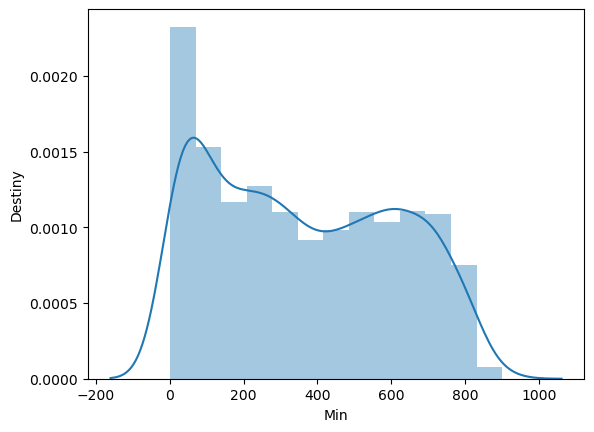

In [6]:
#kernel map
sns.distplot(data['Min'], rug=False, hist=True)
plt.ylabel('Destiny')
plt.xlabel('Min')
plt.show()

     node_1 node_2 weight
0       USA   MFFW       
1       MAR     DF       
2       FRA     MF       
3       GHA     MF       
4       FRA     MF       
...     ...    ...    ...
2234    ITA     DF       
2235    FRA     DF       
2236    ESP     DF       
2237    ESP     MF       
2238    POL     MF       

[2239 rows x 3 columns]
Graph with 113 nodes and 400 edges


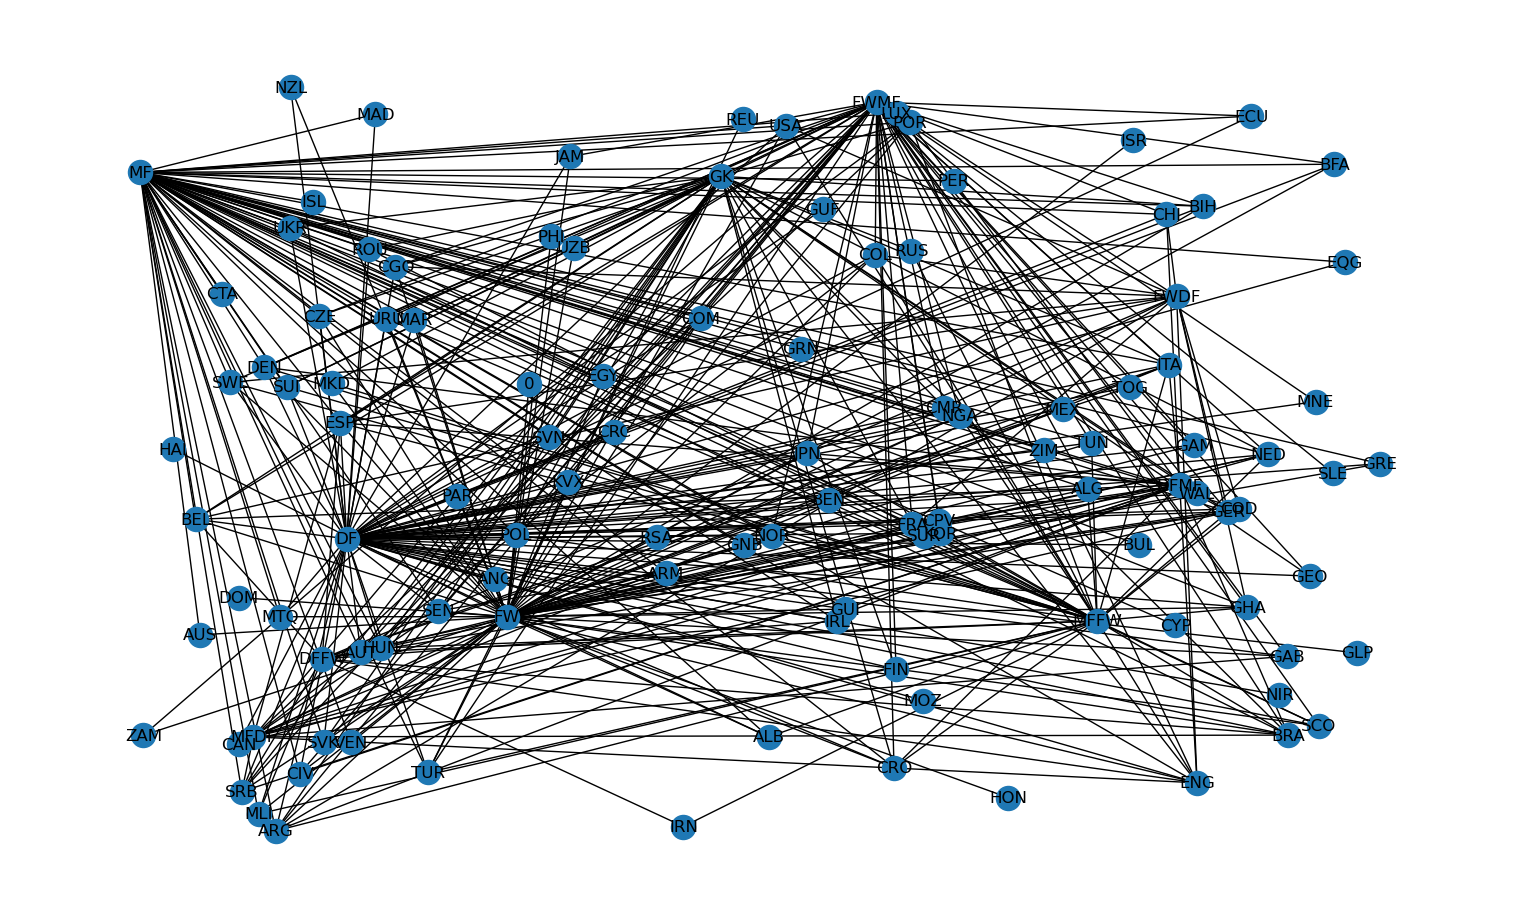

In [7]:
##网络图
plt.figure(figsize=(15, 9))
node_1 = list(data['Nation'])
node_2 = list(data['Pos'])
weight = ['' for i in range(data.shape[0])]

df = pd.DataFrame({'node_1':node_1, 'node_2':node_2,'weight':weight})
print(df)
G = nx.from_pandas_edgelist(df, 'node_1', 'node_2', edge_attr=True, create_using=nx.Graph())
print(G)
pos = nx.random_layout(G, seed=23)  
nx.draw(G, pos=pos, with_labels=True)
labels = {e:G.edges[e]['weight'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
plt.show()

In [8]:

def regress(x,y):
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant, beta = res.params
    r2 = res.rsquared
    return constant, beta, r2

In [9]:
constant,beta,r2 = regress(data['MP'],data['Age'])
print(constant,beta,r2)

24.812610520326295 0.2117703176667 0.016460535924608388


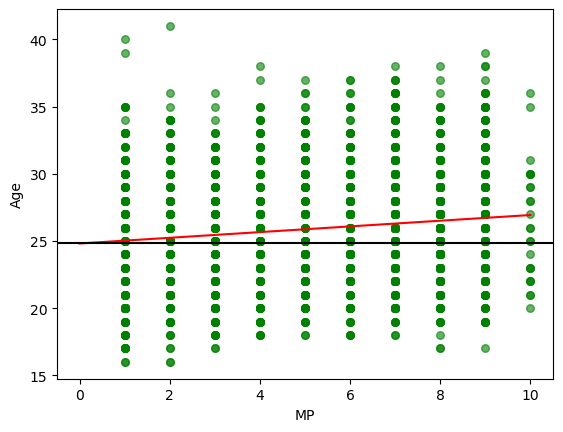

In [10]:
plt.scatter(data['MP'],data['Age'],s=30,c='g',alpha=0.6)
x = np.linspace(0,10)
plt.plot(x,constant + x*beta,"red")
plt.axhline(y=constant, color='k', linestyle='-')
plt.xlabel('MP')
plt.ylabel('Age')
plt.show()

In [11]:
constant_,beta_,r2_ = regress(data['SoT'],data['Shots'])
print(constant_,beta_,r2_)


0.6463283593847283 1.5125202384048193 0.4715313408294526


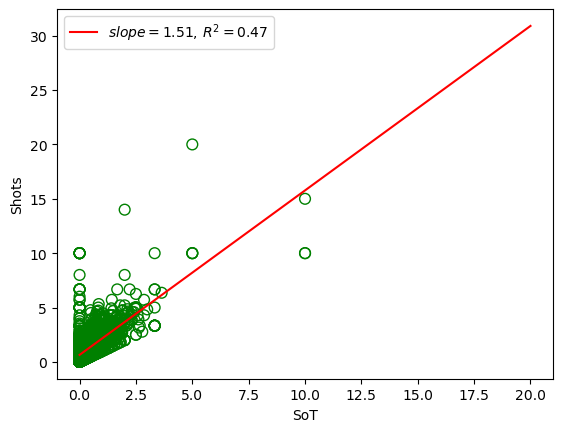

In [12]:
plt.scatter(data['SoT'],data['Shots'],s=60,facecolors='none', edgecolors='g')
x = np.linspace(0,20)
lab = r'$slope = %.2f, \,R^2 = %.2f$' %(beta_,r2_)
plt.plot(x,constant_ + x*beta_,"red",label=lab)
plt.legend(loc = 'upper left')
plt.xlabel('SoT')
plt.ylabel('Shots')
plt.show()